In [76]:
# XOR gate using Numpy
import numpy as np
# input: XOR gate, type: ndaaray

n1 = 4
n2 = 1
feature_num = 2 
input_num = 4
learning_rate = 0.1
epoch_num = 5000

# we only have 4 training data.
Input_arry = np.array([[0,0],[0,1],[1,0],[1,1]]).T
print("shape_Input_array", Input_arry.shape)
Output_array=np.array([0,1,1,0]).reshape(n2, input_num)
print("output_array.shape", Output_array, Output_array.shape)


# 1.Random initialization of weights
np.random.seed(314)
theta1=np.random.rand(n1,feature_num)
theta2=np.random.rand(n2,n1)

shape_Input_array (2, 4)
output_array.shape [[0 1 1 0]] (1, 4)


In [77]:
def sigmoid(x):
   return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

# 2. Forward Propogation, 1 layer NN (2 input,4 hidden layer, 1 output)
def forward_run(theta1, theta2, Input_arry):
    z1=np.dot(theta1, Input_arry) # z1=theta1*Input_arry  (n1,feature_num)*(feature_num,input_num)
    # print("z1", z1, z1.shape)
    a1=sigmoid(z1) # shape: (n1,input_num)
    z2=np.dot(theta2, a1)
    a2=sigmoid(z2)
    return a2,z2, a1,z1 # shape:(n2,input_num)

def loss(y):
    loss_sum=np.sum((y-Output_array) ** 2)
    # print("loss sum =", loss_sum)
    # loss_sum = -(1/2)*np.sum(Output_array*np.log(y)+(1-Output_array)*np.log(1-y))
    return  loss_sum

def loss_der(y):
    return (y-Output_array)

def back_prop(theta2,a2,z2,a1,z1):
    #updata theta2 
    #initialize the gradient to 0
    z2_der, diff_theta2,a1_der, z1_der,diff_theta1 = 0,0,0,0,0
    z2_der=loss_der(a2)*sigmoid_der(z2)
    diff_theta2=np.dot(z2_der, a1.T)
    a1_der=np.dot(theta2.T, z2_der)
    z1_der=a1_der*sigmoid_der(z1)
    diff_theta1=np.dot(z1_der, Input_arry.T)
    return  diff_theta1, diff_theta2
 

loss= 0.07264093163491024
theta1= (4, 2) theta2= (1, 4)


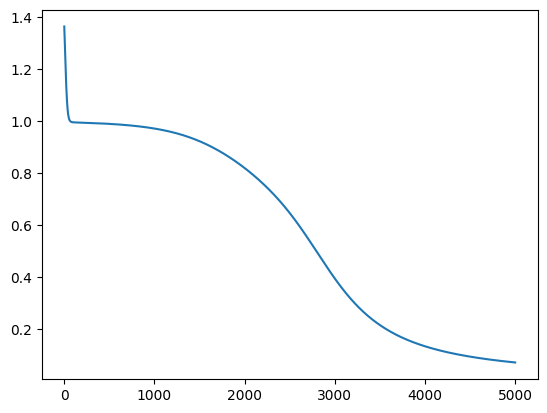

In [78]:
Loss = []
for trail in range(epoch_num):
    # 3. forward
    a2,z2,a1,z1=forward_run(theta1, theta2, Input_arry)
    # print(f"a2={a2.shape}, z2={z2.shape}, a1={a1.shape}, z1={z1.shape}")
    loss_val = loss(a2) # 
    # print("trail=", trail,"loss=", loss_val)
    # 4.Back Propagation
    d_theta1, d_theta2 =back_prop(theta2,a2,z2,a1,z1)
    theta2 = theta2 - learning_rate* d_theta2
    # print("theta2_update 1 time= ", theta2, theta2.shape,learning_rate* diff_theta[1] )
    theta1 = theta1 - learning_rate * d_theta1
    # print("theta1=", theta1, "theta2=", theta2)
    Loss.append(loss_val)
# print the last item of loss
print("loss=", Loss[-1])
print("theta1=", theta1.shape, "theta2=", theta2.shape)
import matplotlib.pyplot as plt
#plot the Loss over the trail
plt.plot(Loss)
plt.show()    

In [79]:
def predict(theta1,theta2,input):
    a2,z2,a1,z1 = forward_run(theta1,theta2,input)
    print(f"a2={a2}, z2={z2.shape}, a1={a1.shape}, z1={z1.shape}")
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [80]:
# test the model
test_input = np.array([[0,0]]).T
print("test_input", test_input.shape)
predict(theta1,theta2,test_input)


test_input (2, 1)
a2=[[0.17389991]], z2=(1, 1), a1=(4, 1), z1=(4, 1)
For input [0, 0] output is 0
